<a href="https://colab.research.google.com/github/kapilpandey09/NLP/blob/main/spamclassifier_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
messages = pd.read_csv('/content/sample_data/SMSSpamCollection', sep='\t', names=["label", "message"])

In [ ]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
messages.isnull().sum()

,0
label,0
message,0


In [ ]:
messages.shape
messages.columns     # column names


Index(['label', 'message'], dtype='object')

In [ ]:
messages.dtypes


,0
label,object
message,object


In [ ]:
messages.duplicated().sum()

np.int64(403)

In [ ]:
messages.describe()


,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
messages.describe(percentiles=[0.01,0.05,0.95,0.99])


,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
messages["label"].value_counts(normalize=True) * 100



,proportion
label,
ham,86.593683
spam,13.406317


In [ ]:
(messages["message"].str.strip() == "").sum()


np.int64(0)

In [ ]:
messages.duplicated(subset="message").sum()


np.int64(403)

In [ ]:
messages["char_len"] = messages["message"].str.len()
messages["word_len"] = messages["message"].str.split().apply(len)

In [ ]:
messages

,label,message,char_len,word_len
0,ham,"Go until jurong point, crazy.. Available only ...",111,20
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,ham,U dun say so early hor... U c already then say...,49,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,30
5568,ham,Will ü b going to esplanade fr home?,36,8
5569,ham,"Pity, * was in mood for that. So...any other s...",57,10
5570,ham,The guy did some bitching but I acted like i'd...,125,26


In [ ]:
messages = messages.drop_duplicates(subset="message")


In [ ]:
messages['label'].value_counts(normalize=True) * 100

,proportion
label,
ham,87.366996
spam,12.633004


In [ ]:
messages.groupby("label")[["char_len","word_len"]].mean()


,char_len,word_len
label,,
ham,70.905890,14.239814
spam,137.704441,23.739663


# Main Code **Start**

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
messages.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       5562, 5563, 5564, 5565, 5566, 5567, 5568, 5569, 5570, 5571],
      dtype='int64', length=5169)

In [ ]:
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

corpus = []
kept_indices = [] # To store the original indices of messages that result in non-empty reviews

for i in messages.index:
    review = re.sub('[^a-zA-Z]', ' ', messages.loc[i, 'message'])
    review = review.lower().split()
    review = [ps.stem(word) for word in review if word not in stop_words]
    review = ' '.join(review)

    if review.strip():
        corpus.append(review)
        kept_indices.append(i) # Append the original index only if the review is not empty

In [ ]:
print(corpus)

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat', 'ok lar joke wif u oni', 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli', 'u dun say earli hor u c alreadi say', 'nah think goe usf live around though', 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv', 'even brother like speak treat like aid patent', 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun', 'winner valu network custom select receivea prize reward claim call claim code kl valid hour', 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free', 'gonna home soon want talk stuff anymor tonight k cri enough today', 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info', 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw', 'search right word thank breather promis wont 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus)

In [ ]:
cv.vocabulary_

{'go': np.int64(886),
 'point': np.int64(1613),
 'crazi': np.int64(484),
 'avail': np.int64(137),
 'bugi': np.int64(263),
 'great': np.int64(918),
 'world': np.int64(2438),
 'la': np.int64(1160),
 'buffet': np.int64(262),
 'cine': np.int64(379),
 'got': np.int64(905),
 'wat': np.int64(2372),
 'ok': np.int64(1475),
 'lar': np.int64(1168),
 'joke': np.int64(1127),
 'wif': np.int64(2410),
 'oni': np.int64(1484),
 'free': np.int64(803),
 'entri': np.int64(672),
 'wkli': np.int64(2428),
 'comp': np.int64(424),
 'win': np.int64(2414),
 'cup': np.int64(505),
 'final': np.int64(755),
 'tkt': np.int64(2228),
 'st': np.int64(2019),
 'may': np.int64(1296),
 'text': np.int64(2172),
 'receiv': np.int64(1741),
 'question': np.int64(1706),
 'std': np.int64(2035),
 'txt': np.int64(2284),
 'rate': np.int64(1722),
 'appli': np.int64(98),
 'dun': np.int64(635),
 'say': np.int64(1835),
 'earli': np.int64(639),
 'hor': np.int64(1019),
 'alreadi': np.int64(68),
 'nah': np.int64(1397),
 'think': np.int64(219

In [ ]:
print(X)



<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 37010 stored elements and shape (5162, 2500)>
  Coords	Values
  (0, 886)	1
  (0, 1613)	1
  (0, 484)	1
  (0, 137)	1
  (0, 263)	1
  (0, 918)	1
  (0, 2438)	1
  (0, 1160)	1
  (0, 262)	1
  (0, 379)	1
  (0, 905)	1
  (0, 2372)	1
  (1, 1475)	1
  (1, 1168)	1
  (1, 1127)	1
  (1, 2410)	1
  (1, 1484)	1
  (2, 803)	1
  (2, 672)	2
  (2, 2428)	1
  (2, 424)	1
  (2, 2414)	1
  (2, 505)	1
  (2, 755)	1
  (2, 2228)	1
  :	:
  (5157, 254)	1
  (5157, 1333)	1
  (5157, 643)	1
  (5158, 886)	1
  (5158, 1013)	1
  (5158, 800)	1
  (5158, 682)	1
  (5159, 2083)	1
  (5159, 1363)	1
  (5160, 803)	1
  (5160, 2387)	1
  (5160, 1210)	1
  (5160, 1420)	1
  (5160, 2319)	1
  (5160, 1969)	1
  (5160, 271)	1
  (5160, 656)	1
  (5160, 849)	1
  (5160, 934)	1
  (5160, 1087)	1
  (5160, 18)	1
  (5160, 202)	1
  (5161, 1399)	1
  (5161, 2267)	1
  (5161, 1803)	1


In [ ]:
# Filter the messages DataFrame to only include rows whose processed text is in corpus
messages_filtered = messages.loc[kept_indices]

y = pd.get_dummies(messages_filtered['label'])
y = y.iloc[:,1].values

In [ ]:
y

array([False, False,  True, ..., False, False, False])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [ ]:

y_pred=spam_detect_model.predict(X_test)
y_pred


array([False, False, False, ..., False, False,  True])

In [ ]:
from sklearn.metrics import accuracy_score
print("accuracy:", accuracy_score(y_test, y_pred))

accuracy: 0.9757986447241046


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# fit
tfvectorizer = TfidfVectorizer(max_features=2500)
X = tfvectorizer.fit_transform(corpus).toarray()

In [ ]:
y=pd.get_dummies(messages_filtered['label'])
y=y.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [ ]:

y_pred=spam_detect_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("accuracy:", accuracy_score(y_test, y_pred))


accuracy: 0.9719264278799613


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
messages_filtered

,label,message,char_len,word_len
0,ham,"Go until jurong point, crazy.. Available only ...",111,20
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,ham,U dun say so early hor... U c already then say...,49,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,30
5568,ham,Will ü b going to esplanade fr home?,36,8
5569,ham,"Pity, * was in mood for that. So...any other s...",57,10
5570,ham,The guy did some bitching but I acted like i'd...,125,26


In [ ]:
messages_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5162 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5162 non-null   object
 1   message   5162 non-null   object
 2   char_len  5162 non-null   int64 
 3   word_len  5162 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 201.6+ KB


In [ ]:
messages_filtered.shape

(5162, 4)

In [ ]:
messages_filtered.describe()

,char_len,word_len
count,5162.000000,5162.000000
mean,79.436459,15.457187
std,58.422742,11.114568
min,2.000000,1.000000
25%,36.000000,7.000000
50%,61.000000,12.000000
75%,119.000000,22.000000
max,910.000000,171.000000


In [ ]:
messages_filtered["label"].value_counts(normalize=True) * 100

,proportion
label,
ham,87.349864
spam,12.650136


<Axes: xlabel='label'>

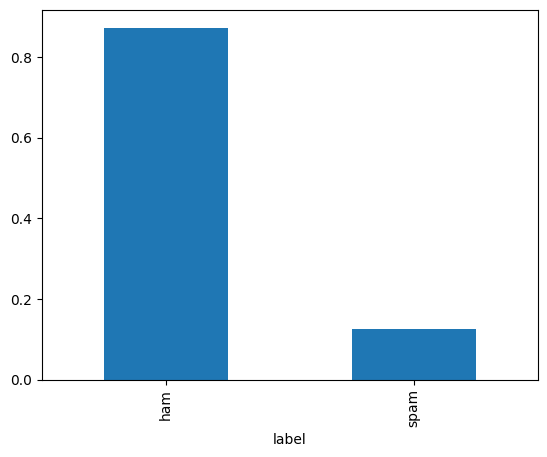

In [ ]:
df = messages_filtered.copy()
df["label"].value_counts(normalize=True).plot(kind="bar")


<Axes: xlabel='label', ylabel='char_len'>

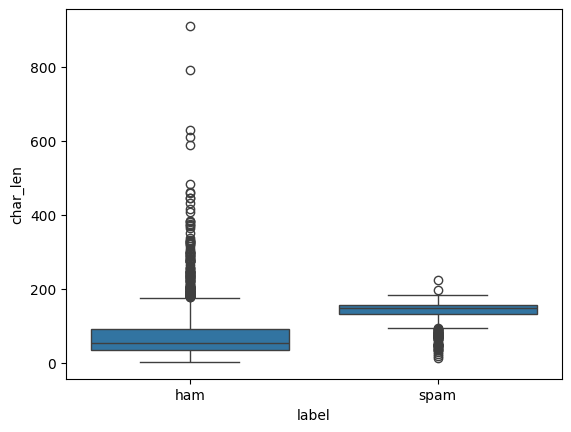

In [ ]:
import seaborn as sns

sns.boxplot(x="label", y="char_len", data=df)


<Axes: xlabel='label', ylabel='word_len'>

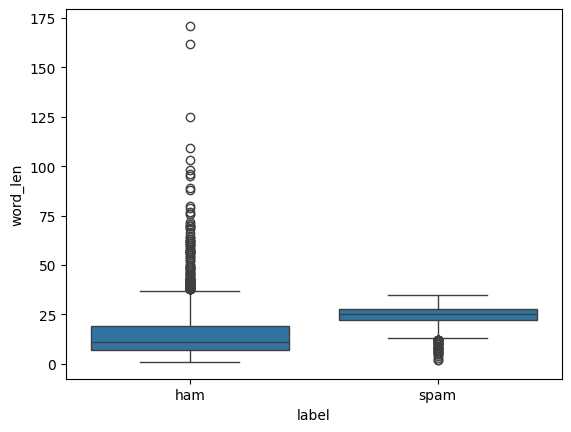

In [ ]:
sns.boxplot(x="label", y="word_len", data=df)


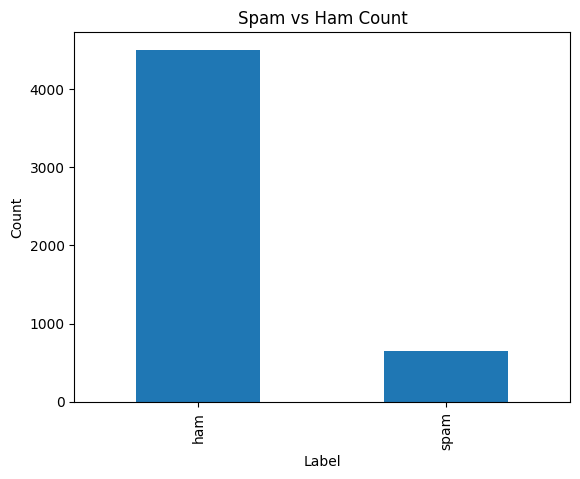

In [ ]:
import matplotlib.pyplot as plt

df["label"].value_counts().plot(kind="bar")
plt.title("Spam vs Ham Count")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


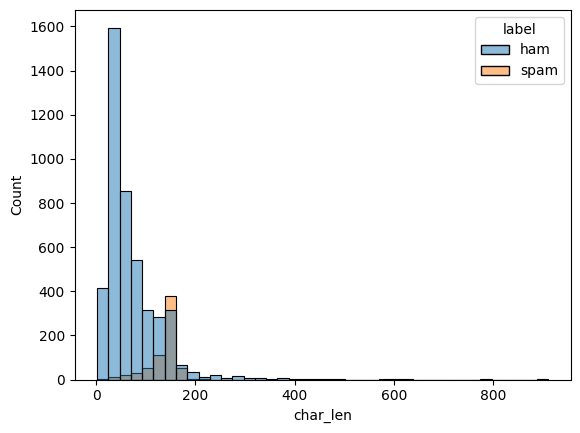

In [ ]:
sns.histplot(data=df, x="char_len", hue="label", bins=40)
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      1.00      0.98       873
        True       0.99      0.82      0.90       160

    accuracy                           0.97      1033
   macro avg       0.98      0.91      0.94      1033
weighted avg       0.97      0.97      0.97      1033



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df["label"] = df["label"].map({"ham": 0, "spam": 1})



In [ ]:
ps = PorterStemmer()
stop_words = set(stopwords.words("english"))

corpus = []

for msg in df["message"]:
    review = re.sub("[^a-zA-Z]", " ", msg)
    review = review.lower().split()
    review = [ps.stem(w) for w in review if w not in stop_words]
    review = " ".join(review)

    if review.strip():
        corpus.append(review)
    else:
        corpus.append("")   # alignment maintain


In [ ]:
tfidf = TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(corpus)
y = df["label"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
model = LogisticRegression(class_weight="balanced", max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
# Probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Custom threshold (0.3 instead of 0.5)
y_pred = (y_prob > 0.3).astype(int)


In [ ]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       902
           1       0.72      0.98      0.83       131

    accuracy                           0.95      1033
   macro avg       0.86      0.97      0.90      1033
weighted avg       0.96      0.95      0.95      1033


Confusion Matrix:

[[853  49]
 [  2 129]]
